In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
df_AMD=pd.read_parquet('stock_prices/1d_adj/AMD.parquet')
df_DIA=pd.read_parquet('stock_prices/1d_adj/DIA.parquet')
df_INTC=pd.read_parquet('stock_prices/1d_adj/INTC.parquet')
df_IWM=pd.read_parquet('stock_prices/1d_adj/IWM.parquet')
df_NVDA=pd.read_parquet('stock_prices/1d_adj/NVDA.parquet')
df_SPY=pd.read_parquet('stock_prices/1d_adj/SPY.parquet')


In [36]:
df_AMD.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1380 entries, 2020-01-02 to 2025-06-30
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   open               1380 non-null   float64
 1   high               1380 non-null   float64
 2   low                1380 non-null   float64
 3   close              1380 non-null   float64
 4   adjusted_close     1380 non-null   float64
 5   volume             1380 non-null   int64  
 6   dividend_amount    1380 non-null   float64
 7   split_coefficient  1380 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 97.0 KB


In [37]:
df_NVDA.isnull().sum()

open                 0
high                 0
low                  0
close                0
adjusted_close       0
volume               0
dividend_amount      0
split_coefficient    0
dtype: int64

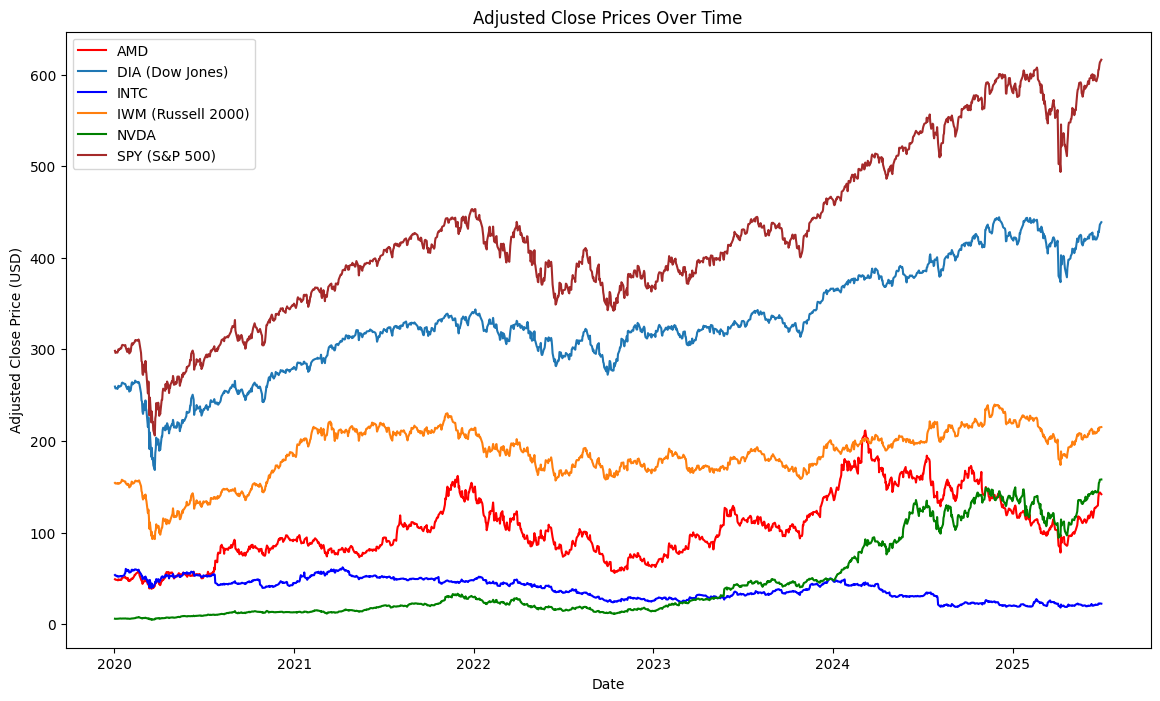

In [52]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df_AMD,x=df_AMD.index, y=df_AMD['adjusted_close'],label='AMD',color='red')
sns.lineplot(data=df_DIA,x=df_DIA.index, y=df_DIA['adjusted_close'],label='DIA (Dow Jones)')
sns.lineplot(data=df_INTC,x=df_INTC.index, y=df_INTC['adjusted_close'],label='INTC',color='blue')
sns.lineplot(data=df_IWM,x=df_IWM.index,y=df_IWM['adjusted_close'],label='IWM (Russell 2000)',)
sns.lineplot(data=df_NVDA,x=df_NVDA.index,y=df_NVDA['adjusted_close'],label='NVDA',color='green')
sns.lineplot(data=df_SPY,x=df_SPY.index,y=df_SPY['adjusted_close'],label='SPY (S&P 500)',color='brown')
plt.title('Adjusted Close Prices Over Time')
plt.ylabel('Adjusted Close Price (USD)')
plt.xlabel('Date')
plt.legend()
plt.show()

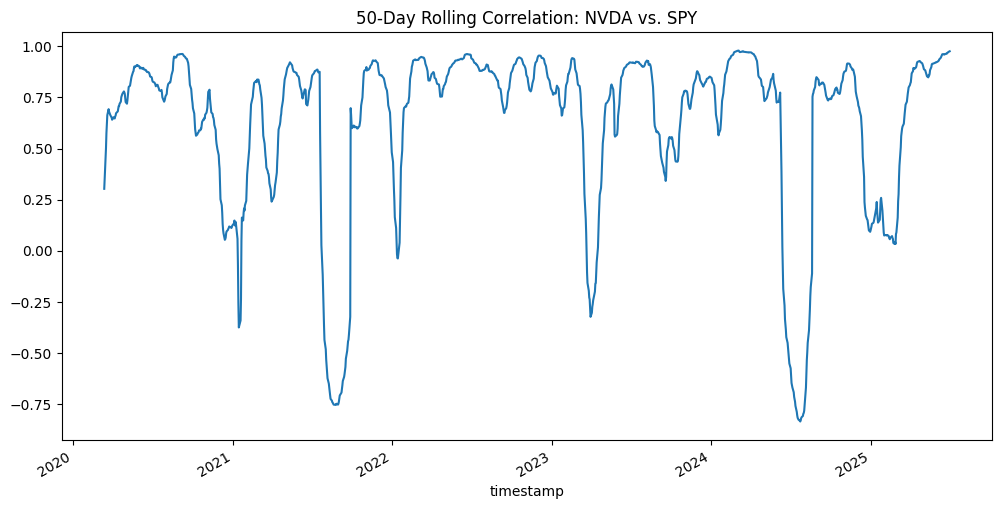

In [62]:
# df_returns = df_closes.pct_change()
rolling_corr = df_NVDA['close'].rolling(window=50).corr(df_SPY['close'])

plt.figure(figsize=(12, 6))
rolling_corr.plot()
plt.title('50-Day Rolling Correlation: NVDA vs. SPY')
plt.show()

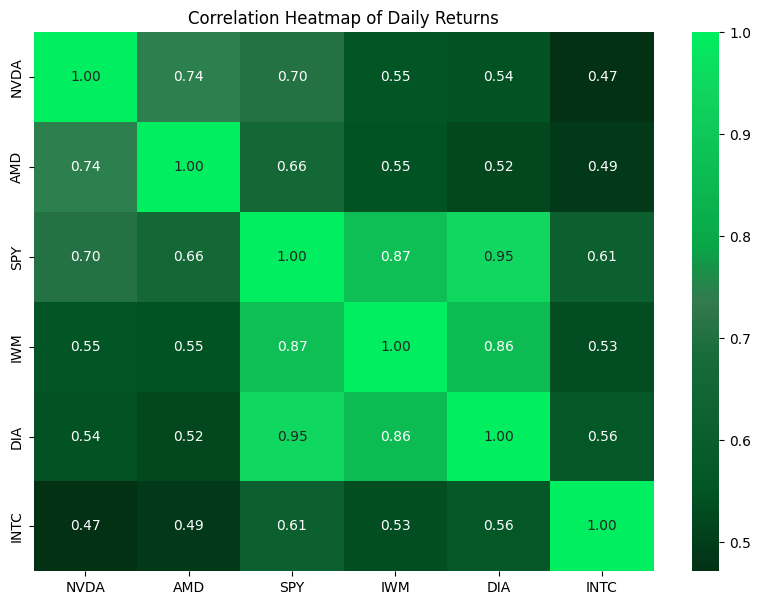

In [99]:
# 1. Combine all the 'adjusted_close' columns into one DataFrame
from  matplotlib.colors import LinearSegmentedColormap
colors = [
    "#023114",  # darkred
    "#025525",  # red
    "#025e27e9",  # lightcoral
    "#025a25ce",  # white (center)
    "#02a342f8",  # pale green (changed)
    "#04d457f3",  # medium green (changed)
    "#00ee5f"   # dark green (changed)
]
positions = [0, 0.15, 0.4, 0.5, 0.6, 0.9, 1.0]
cmap = LinearSegmentedColormap.from_list("custom_corr", list(zip(positions, colors)), N=256)

df_combined = pd.DataFrame({
    'NVDA': df_NVDA['adjusted_close'],
    'AMD': df_AMD['adjusted_close'],
    'SPY': df_SPY['adjusted_close'],
    'IWM': df_IWM['adjusted_close'],
    'DIA': df_DIA['adjusted_close'],
    'INTC': df_INTC['adjusted_close'],
    
})

# 2. Calculate the correlation of the *returns*
df_returns_corr = df_combined.pct_change().corr()

# 3. Plot the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df_returns_corr, annot=True, cmap=cmap, fmt='.2f')
plt.title('Correlation Heatmap of Daily Returns')
plt.show()

In [39]:
dfl=[df_SPY,df_NVDA,df_IWM,df_INTC,df_DIA,df_AMD]
key=['SPY','NVDA','IWM','INTC','DIA','AMD']
df_all=pd.concat(dfl,keys=key,axis=1)

In [68]:
df_closes = df_all.loc[:, (slice(None), 'adjusted_close')]

# 2. Simplify the column names (e.g., from ('SPY', 'adjusted_close') to 'SPY')
df_closes.columns = df_closes.columns.droplevel(1)



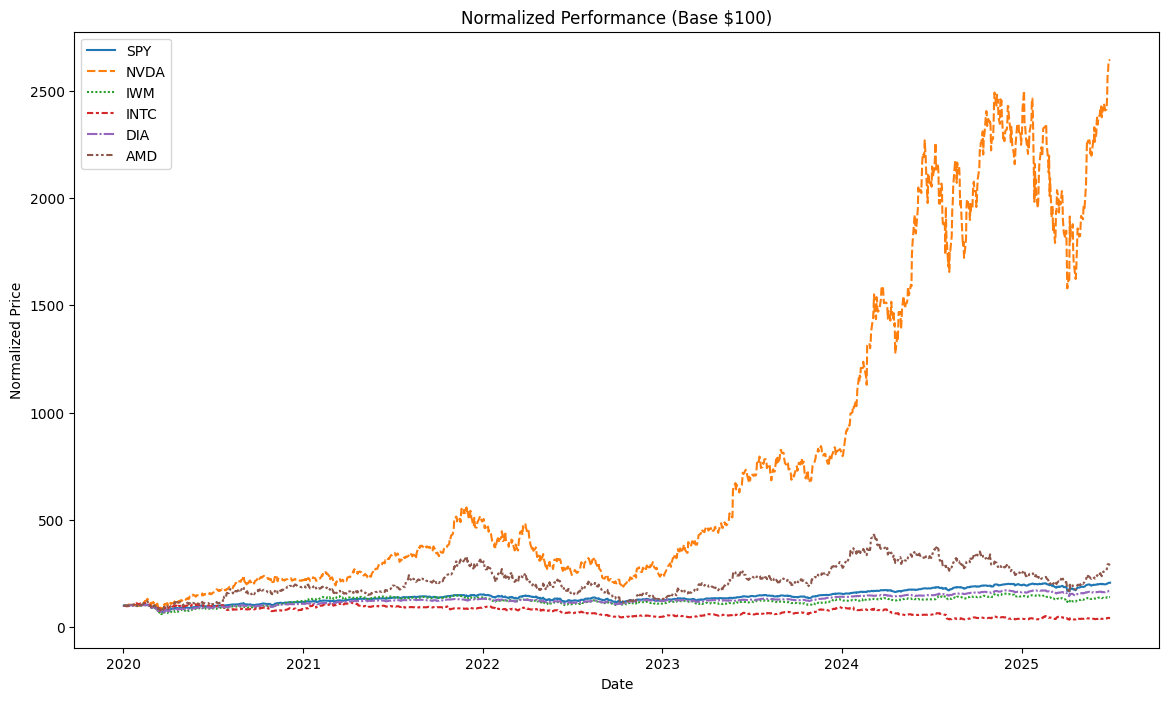

In [69]:
#
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Plot the normalized data
plt.figure(figsize=(14, 8))

# Seaborn can plot all columns of the DataFrame in one command
sns.lineplot(data=df_normalized)

plt.title('Normalized Performance (Base $100)')
plt.ylabel('Normalized Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [70]:
# Calculate the daily percentage returns for all tickers
df_returns = df_closes.pct_change()

# Drop the first row (which will be 'NaN' since there's no prior day to compare)
df_returns = df_returns.dropna()

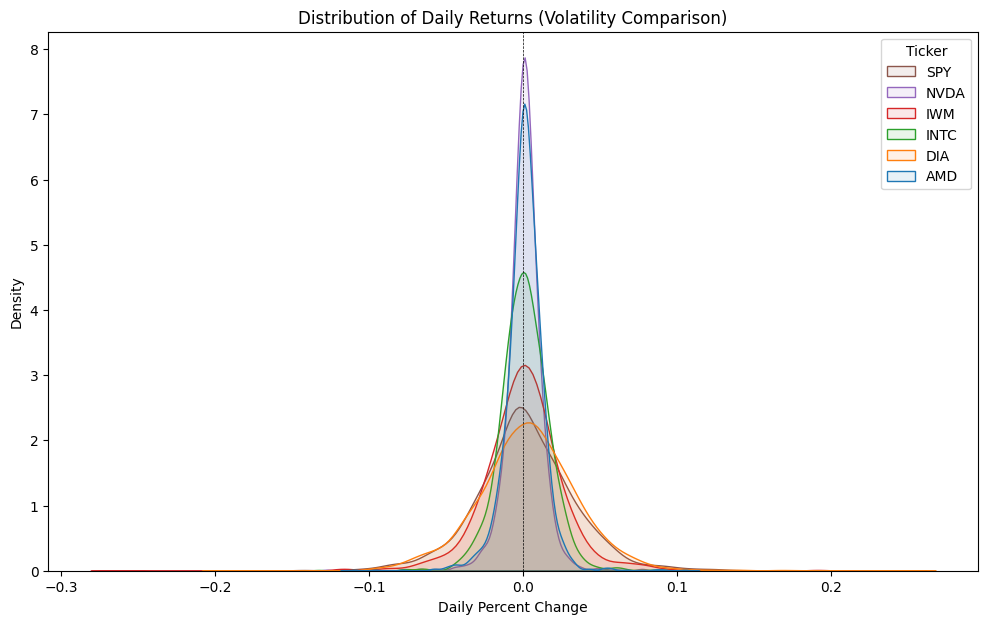

In [73]:
# 1. Create the daily returns DataFrame (if you haven't already)
df_returns = df_closes.pct_change().dropna()

# 2. Plot the distribution of returns (KDE)
plt.figure(figsize=(12, 7))
sns.kdeplot(data=df_returns, fill=True, alpha=0.1)

plt.title('Distribution of Daily Returns (Volatility Comparison)')
plt.xlabel('Daily Percent Change')
plt.ylabel('Density')
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.legend(title='Ticker', labels=df_returns.columns)
plt.show()

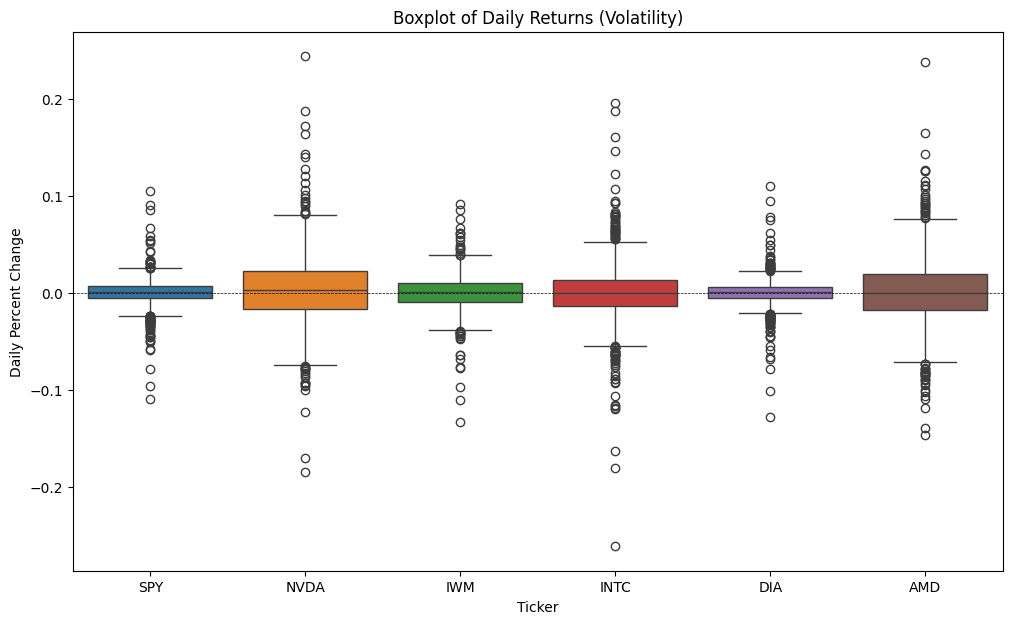

In [76]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_returns)

plt.title('Boxplot of Daily Returns (Volatility)')
plt.ylabel('Daily Percent Change')
plt.xlabel('Ticker')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.show()

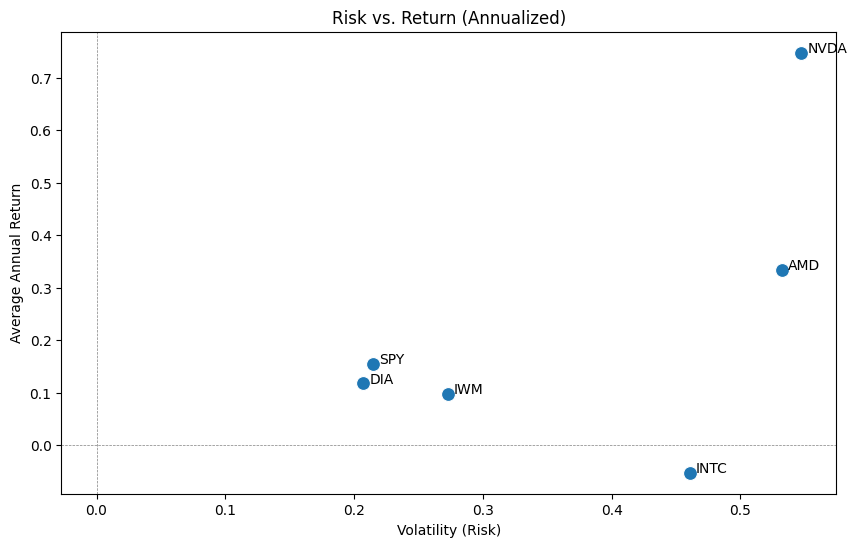

In [77]:
import numpy as np

# Calculate annualized average return and volatility (risk)
# 252 is the standard number of trading days in a year
risk_return_summary = pd.DataFrame({
    'avg_return': df_returns.mean() * 252,
    'volatility': df_returns.std() * np.sqrt(252)
})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=risk_return_summary, 
    x='volatility', 
    y='avg_return',
    s=100  # Make points larger
)

# Add labels for each point
for i, row in risk_return_summary.iterrows():
    plt.text(row['volatility'] + 0.005, row['avg_return'], i)

plt.title('Risk vs. Return (Annualized)')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Average Annual Return')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()

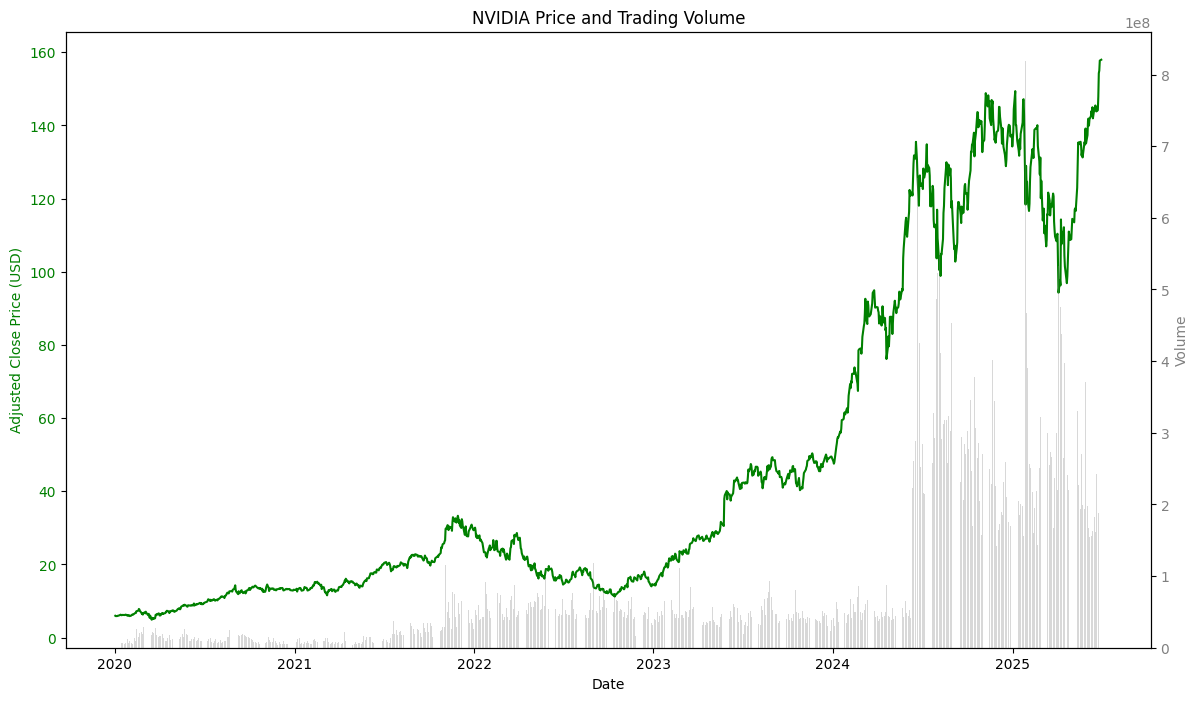

In [78]:
# This example plots just for NVDA, using the original df_all
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Adjusted Close on the first y-axis (ax1)
ax1.plot(df_all.index, df_all[('NVDA', 'adjusted_close')], color='green', label='NVDA Price')
ax1.set_ylabel('Adjusted Close Price (USD)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis (ax2) that shares the same x-axis
ax2 = ax1.twinx()
ax2.bar(df_all.index, df_all[('NVDA', 'volume')], color='grey', alpha=0.3, label='Volume')
ax2.set_ylabel('Volume', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

plt.title('NVIDIA Price and Trading Volume')
ax1.set_xlabel('Date')
plt.show()

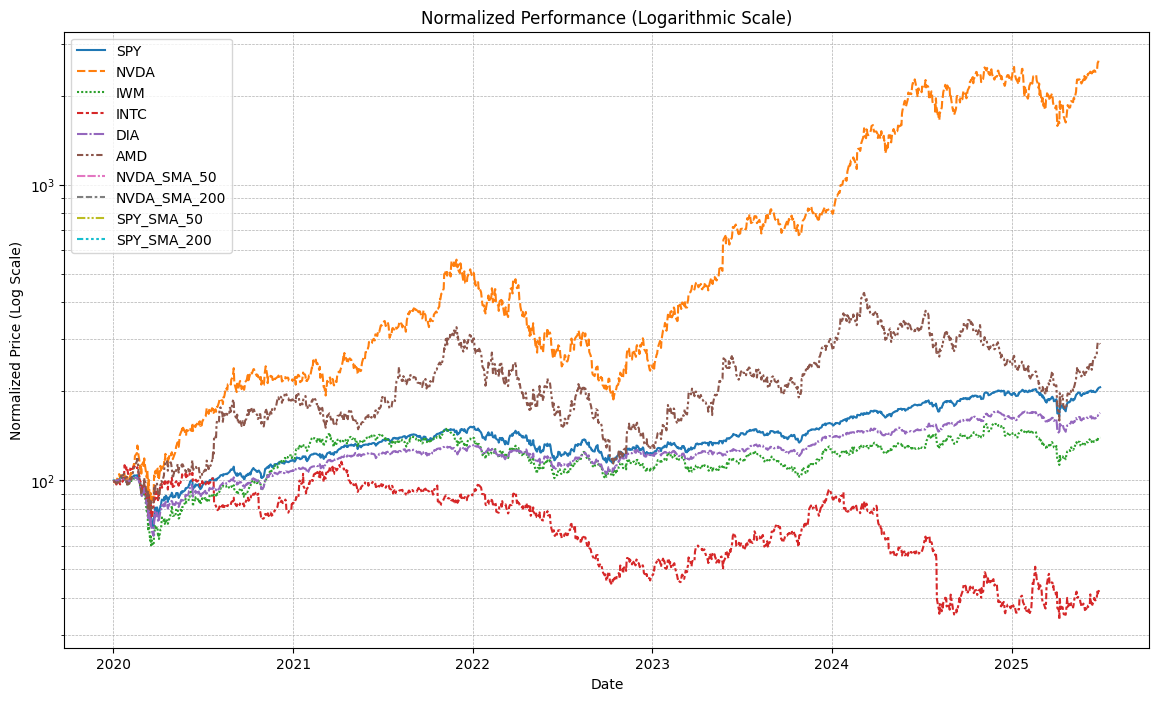

In [79]:
# 1. Create the normalized DataFrame (if you don't have it)
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_normalized) # Plot as normal

# 3. Add the single line to change the y-axis
plt.yscale('log') 

plt.title('Normalized Performance (Logarithmic Scale)')
plt.ylabel('Normalized Price (Log Scale)')
plt.xlabel('Date')
plt.legend()

# Optional: Add a clearer grid for the log scale
plt.grid(True, which="both", ls="--", linewidth=0.5) 
plt.show()

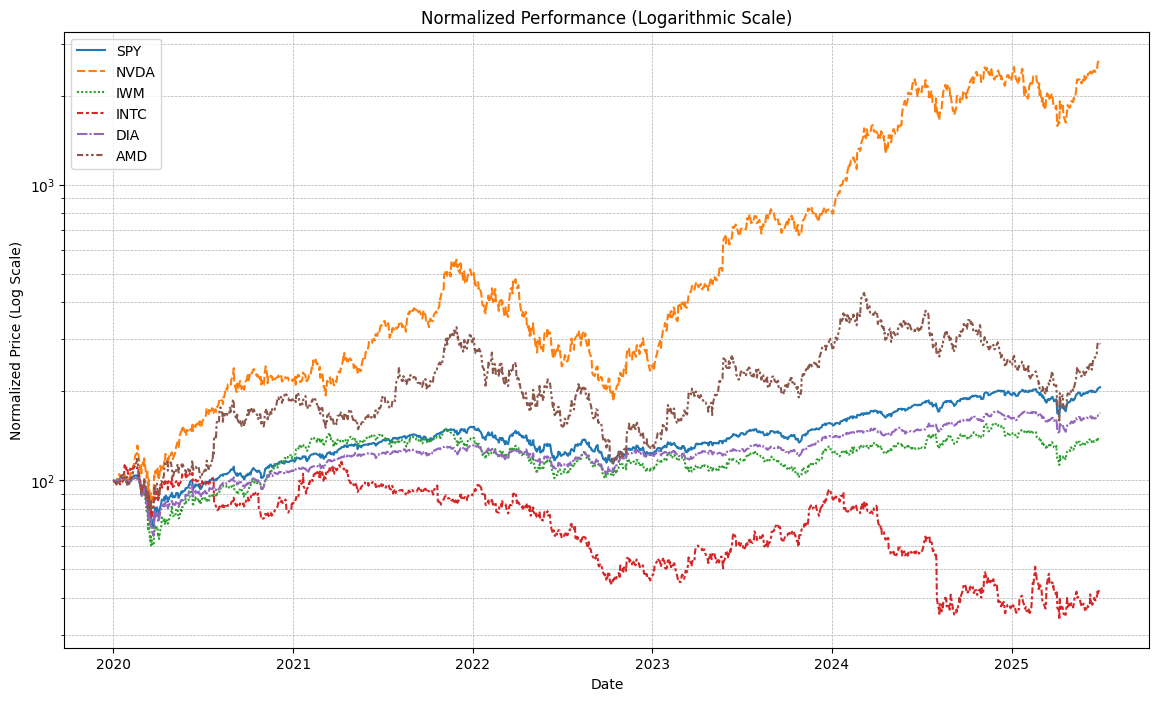

In [ ]:
# 1. Create the normalized DataFrame (if you don't have it)
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_normalized) # Plot as normal

# 3. Add the single line to change the y-axis
plt.yscale('log') 

plt.title('Normalized Performance (Logarithmic Scale)')
plt.ylabel('Normalized Price (Log Scale)')
plt.xlabel('Date')
plt.legend()

# Optional: Add a clearer grid for the log scale
plt.grid(True, which="both", ls="--", linewidth=0.5) 
plt.show()

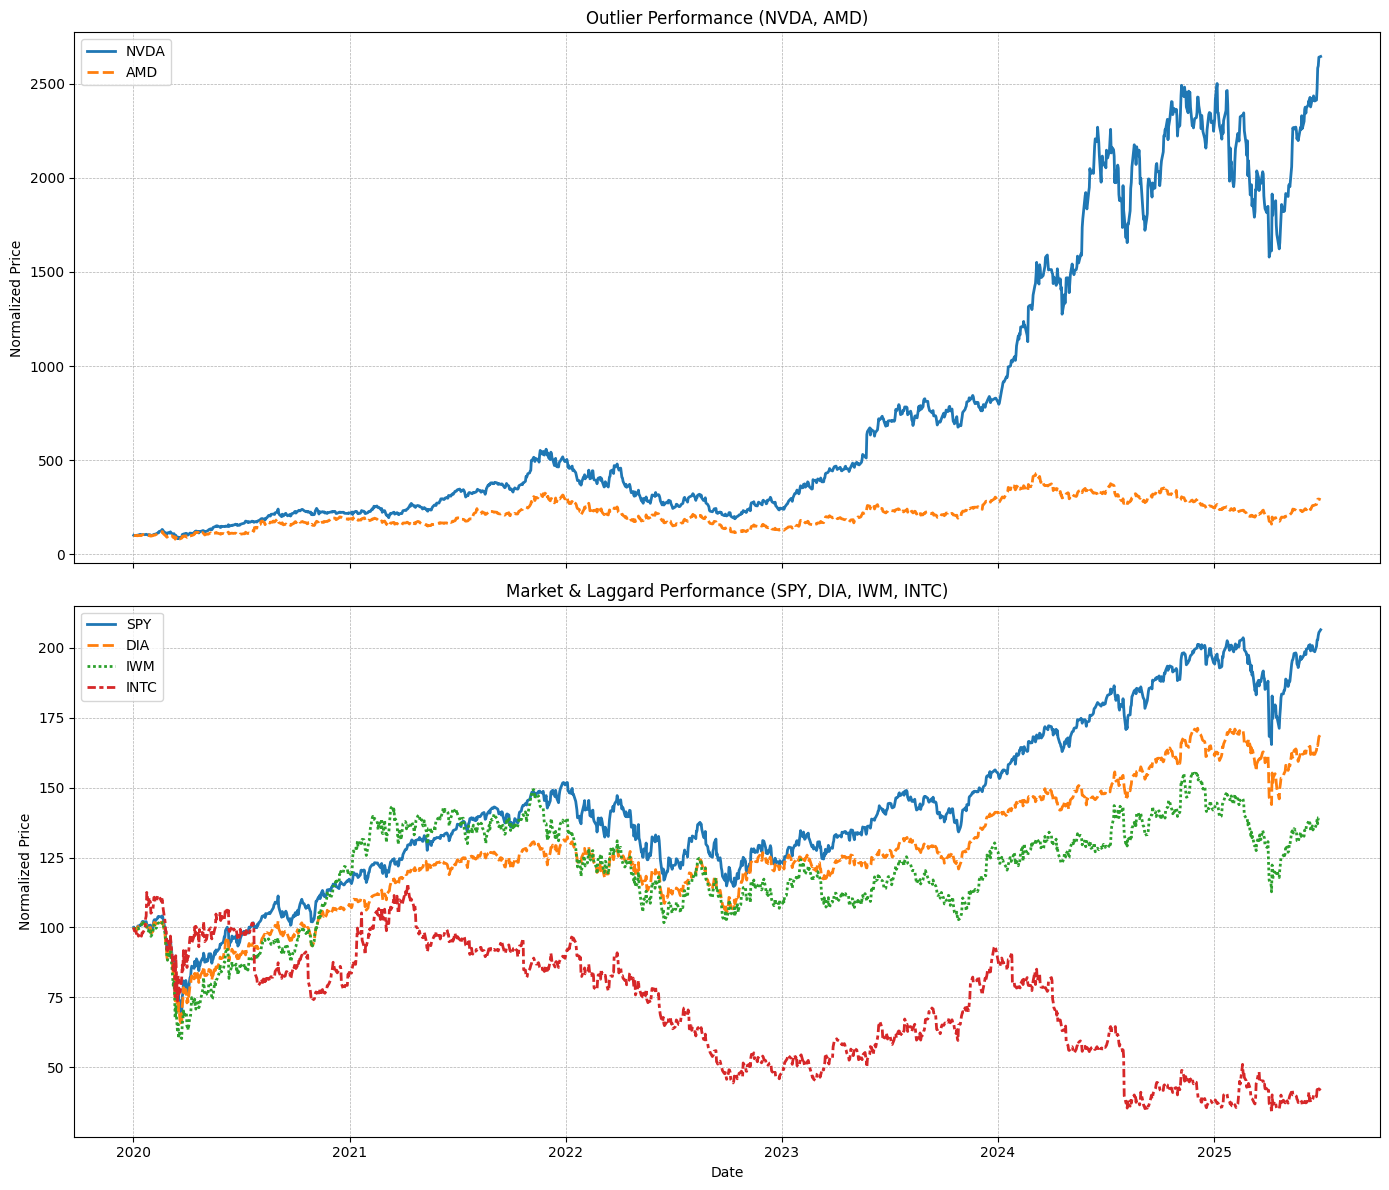

In [80]:
# 1. Create the normalized DataFrame
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Create a 2-panel figure
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 12), sharex=True)

# 3. Plot the outliers (NVDA, AMD) on the top panel (ax1)
sns.lineplot(data=df_normalized[['NVDA', 'AMD']], ax=ax1, linewidth=2)
ax1.set_title('Outlier Performance (NVDA, AMD)')
ax1.set_ylabel('Normalized Price')
ax1.legend()
ax1.grid(True, ls="--", linewidth=0.5)

# 4. Plot the "Market" group on the bottom panel (ax2)
sns.lineplot(data=df_normalized[['SPY', 'DIA', 'IWM', 'INTC']], ax=ax2, linewidth=2)
ax2.set_title('Market & Laggard Performance (SPY, DIA, IWM, INTC)')
ax2.set_ylabel('Normalized Price')
ax2.legend()
ax2.grid(True, ls="--", linewidth=0.5)

plt.xlabel('Date')
plt.tight_layout() # Keeps plots from overlapping
plt.show()

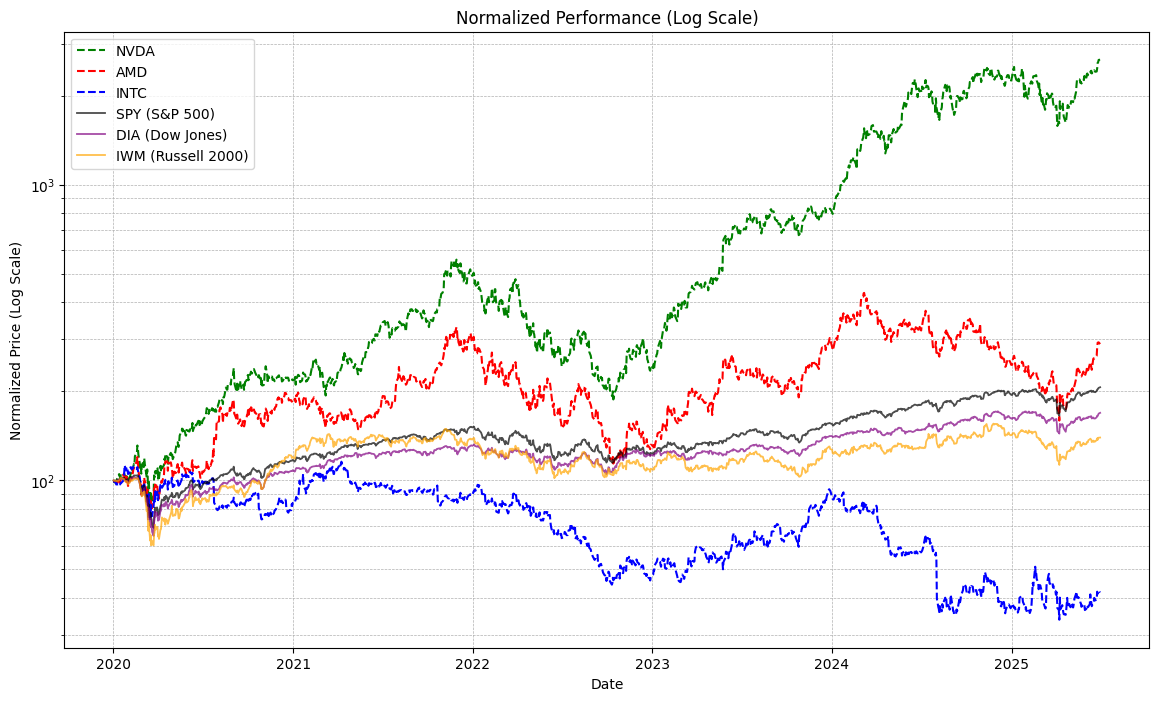

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# This assumes 'df_closes' is clean (no SMA columns)
# 1. Create the normalized DataFrame
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Set up the plot
plt.figure(figsize=(14, 8))
plt.yscale('log') # Set log scale

# 3. Plot the Companies (Dashed/Dotted Lines)
#    We make them slightly thicker (linewidth=2.5) to stand out
sns.lineplot(data=df_normalized, x=df_normalized.index, y='NVDA', label='NVDA', 
             color='green', linestyle='--', linewidth=1.5)
sns.lineplot(data=df_normalized, x=df_normalized.index, y='AMD', label='AMD', 
             color='red', linestyle='--', linewidth=1.5)
sns.lineplot(data=df_normalized, x=df_normalized.index, y='INTC', label='INTC', 
             color='blue', linestyle='--', linewidth=1.5)

# 4. Plot the Indices (Solid Lines)
#    We make them thinner and slightly transparent (alpha=0.7) to act as a background
sns.lineplot(data=df_normalized, x=df_normalized.index, y='SPY', label='SPY (S&P 500)', 
             color='black', linestyle='-', linewidth=1.3, alpha=0.7)
sns.lineplot(data=df_normalized, x=df_normalized.index, y='DIA', label='DIA (Dow Jones)', 
             color='purple', linestyle='-', linewidth=1.3, alpha=0.7)
sns.lineplot(data=df_normalized, x=df_normalized.index, y='IWM', label='IWM (Russell 2000)', 
             color='orange', linestyle='-', linewidth=1.3, alpha=0.7)

# 5. Finalize the plot
plt.title('Normalized Performance (Log Scale)')
plt.ylabel('Normalized Price (Log Scale)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5) 
plt.show()

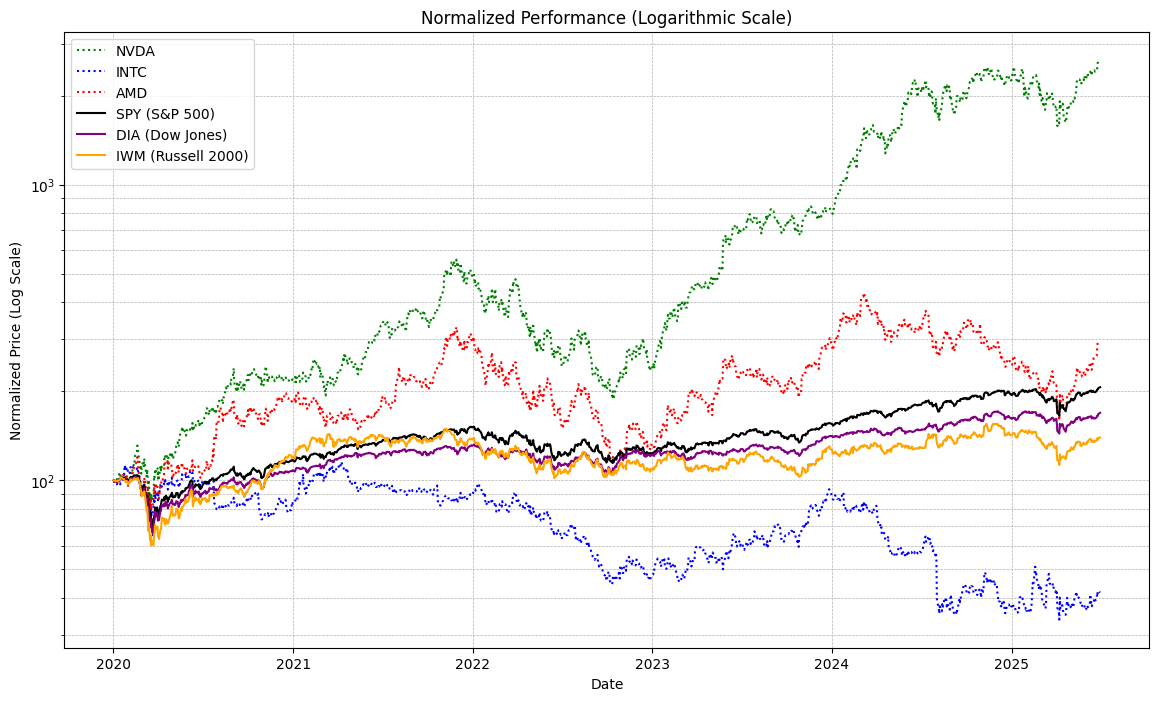

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# This assumes 'df_closes' is clean (no SMA columns)
# 1. Create the normalized DataFrame
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Set up the plot
plt.figure(figsize=(14, 8))
plt.yscale('log') # Set the log scale

# 3. Plot the individual companies with dotted lines
# Using linestyle=':' creates a dotted line.
sns.lineplot(data=df_normalized, x=df_normalized.index, y='NVDA', label='NVDA', 
             color='green', linestyle=':')
sns.lineplot(data=df_normalized, x=df_normalized.index, y='INTC', label='INTC', 
             color='blue', linestyle=':')
sns.lineplot(data=df_normalized, x=df_normalized.index, y='AMD', label='AMD', 
             color='red', linestyle=':')

# 4. Plot the market indices with solid lines
# linestyle='-' is the default, solid line.
sns.lineplot(data=df_normalized, x=df_normalized.index, y='SPY', label='SPY (S&P 500)', 
             color='black', linestyle='-')
sns.lineplot(data=df_normalized, x=df_normalized.index, y='DIA', label='DIA (Dow Jones)', 
             color='purple', linestyle='-')
sns.lineplot(data=df_normalized, x=df_normalized.index, y='IWM', label='IWM (Russell 2000)', 
             color='orange', linestyle='-')


# 5. Finalize the plot
plt.title('Normalized Performance (Logarithmic Scale)')
plt.ylabel('Normalized Price (Log Scale)')
plt.xlabel('Date')
plt.legend()

# Optional: Add a clearer grid
plt.grid(True, which="both", ls="--", linewidth=0.5) 
plt.show()

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# This assumes 'df_closes' is clean (no SMA columns)
# 1. Create the normalized DataFrame
df_normalized = (df_closes / df_closes.iloc[0]) * 100

# 2. Reshape the data for professional plotting (Melt)
# This converts the DataFrame from wide (6 columns) to long (3 columns)
df_plot = df_normalized.reset_index().melt(
    id_vars='Date', 
    var_name='Ticker', 
    value_name='Normalized Price'
)

# 3. Create a new column to define groups
categories = {
    'NVDA': 'Company', 'AMD': 'Company', 'INTC': 'Company',
    'SPY': 'Index', 'DIA': 'Index', 'IWM': 'Index'
}
df_plot['Group'] = df_plot['Ticker'].map(categories)

# 4. Define your visualization rules
# This gives you one central place to manage your plot's appearance
color_palette = {
    'NVDA': 'green', 'AMD': 'red', 'INTC': 'blue',
    'SPY': 'black', 'DIA': 'purple', 'IWM': 'orange'
}

# (1, 1) is the code for 'dotted', '' is the code for 'solid'
dashes_map = {'Company': (1, 1), 'Index': ''} 

# 5. Create the plot with a single, data-driven call
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    data=df_plot,
    x='Date',
    y='Normalized Price',
    hue='Ticker',       # Assign color based on the 'Ticker' column
    style='Group',      # Assign linestyle based on the 'Group' column
    palette=color_palette, # Use our custom color map
    dashes=dashes_map      # Use our custom dash map
)

# 6. Finalize and clean the plot
ax.set_yscale('log')
ax.set_title('Normalized Performance (Logarithmic Scale)')
ax.set_ylabel('Normalized Price (Base $100)')
ax.set_xlabel('Date')

# Improve legend and grid
ax.get_legend().set_title(None) # Remove the "Ticker" title from the legend
ax.grid(True, which="both", ls="--", linewidth=0.5)

# Fix y-axis labels (e.g., show "100" instead of "10^2")
ax.yaxis.set_major_formatter(ScalarFormatter())

plt.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Date']"